In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


#[-]File to Load
#jupyter does not recognize __file__ adding this to avoid
#rewriting the code if it gets exported
try:
    __thisdir__ = os.path.dirname(os.path.abspath(__file__))
except NameError as error:
    __thisdir__ = "."

__csv_path_city__ = os.path.join(__thisdir__,"data","city_data.csv")
__csv_path_ride__ = os.path.join(__thisdir__,"data","ride_data.csv")

# Read the City and Ride Data
city_data = pd.read_csv(__csv_path_city__)
ride_data = pd.read_csv(__csv_path_ride__)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data,city_data,on="city",how='outer')

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


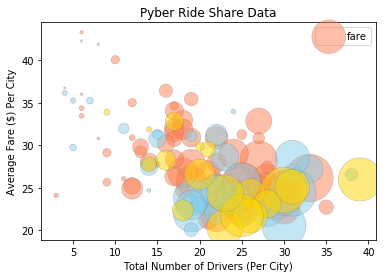

In [46]:
#Average Fare ($) Per City
bubble_y = round(pyber_data.groupby("city").mean()["fare"],2)
#Total Number of Rides Per City
buble_x = pyber_data.groupby("city").count()["ride_id"]
#Total Number of Drivers Per City
buble_s = pyber_data.groupby("city").sum()["driver_count"]
#City Type (Urban, Suburban, Rural)
type_x_city = pd.DataFrame(pyber_data[["city","type"]])
type_x_city.drop_duplicates(inplace=True)
type_x_city.set_index("city", inplace=True)
#Set the proper colors
bubble_color_df = type_x_city.replace({"Urban": "Coral", 
                                       "Suburban": "SkyBlue", 
                                       "Rural":"Gold"})
bubble_color = bubble_color_df["type"]
#Create the figure for the plot
bubbles_mpl = plt.figure
#Creat the plot
plt.scatter(buble_x,
            bubble_y,
            s=buble_s,
            c=bubble_color,
            alpha=0.5,
            edgecolor="grey",
            linewidth=0.5)

plt.title("Pyber Ride Share Data")
plt.xlabel("Total Number of Drivers (Per City)")
plt.ylabel("Average Fare ($) Per City")
#plt.legend(loc='upper left')
#plt.legend()

plt.show()


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [4]:
# Show plot


## Total Fares by City Type

In [5]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

In [7]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [9]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [10]:
# Show Figure
plt.show()